<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

**<center><h3>Naive Bayes Assignment Solution</h3></center>**

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Bag of Words**](#Section71)<br>
  - **7.2** [**Count Vectorizer**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Problem Statement**
---

- The **SMS Spam** Collection v.1 is a public set of SMS **labeled messages** that have been collected for **mobile phone spam** research.

- It has one collection composed by **5,574** English, real and non-enconded **messages**, tagged according being legitimate (ham) or spam.

- Identification of Ham/Spam is an **interesting usecase** of **NLP**(Natural Language Processing).

---
<a name = Section2></a>
# **2. Objective**
---

- The objective of this assignment is to **predict** the likeliness of **email** being **spam or ham**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
import string                                                       # For string related operations
import pprint                                                       # For printing of Collections line by line
from collections import Counter                                     # For estimating frequency
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer         # To perform bag of words from data
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.naive_bayes import MultinomialNB                       # To create a naive bayes model using algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This corpus has been collected from free for research sources at the Internet and it can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/spam.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 5572 | 5 | 491 KB| 

|Id|Feature|Description|
|:--|:--|:--|
|01|**v1**|Whether an email is ham or spam. Contains: [ham, spam]|
|02|**v2**|It is the email message sent to and fro between sender and receiver.|
|03|**Unnamed: 2**|Irrelevant and Un-necessary feature.|
|04|**Unnamed: 3**|Irrelevant and Un-necessary feature.|
|05|**Unnamed: 4**|Irrelevant and Un-necessary feature.|

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/spam.csv', encoding = 'latin1')
print('Data Shape:', data.shape)
data.head()

Data Shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


**Observation:**

- Before diving further let's **rename** the **features** and **drop un-necessary features**.

- Additionally, we will create a **new feature** out of the Message **length**.

In [ ]:
def modify_data(data):
  # Renaming features
  data.rename(mapper = {'v1': 'Label', 'v2':'Message'}, axis = 1, inplace = True)

  # Dropping unnecessary features
  data.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

  # Adding a new feature named as lenght
  data['Length'] = data['Message'].apply(len)
  
  return data

In [ ]:
data = modify_data(data)
data.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,5572.00000,80.11881,59.69084,2.00000,36.00000,61.00000,121.00000,910.00000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
 2   Length   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


In [ ]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- Report shows that there are **3 features** out of which **2 are categorical and 1 is numerical**.

- There is **no missing information** inside our data.

- There are **some duplicate** rows - 403 (**7.2%**).

- **Message** has a **high cardinality**: 5169 distinct values.

- **Message** is **uniformly distributed**.

**Performing Operations**

In [ ]:
def handle_duplicates(data):

  before_shape = data.shape
  print('Data Shape [Before]:', before_shape)

  data.drop_duplicates(inplace = True)

  after_shape = data.shape
  print('Data Shape [After]:', after_shape)

  drop_nums = before_shape[0] - after_shape[0]
  drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

  print('Drop Ratio:', drop_percent, '%')

In [ ]:
handle_duplicates(data)

Data Shape [Before]: (5572, 3)
Data Shape [After]: (5169, 3)
Drop Ratio: 7.2330000000000005 %


**After Handling Duplicate Data**

In [ ]:
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())

Contains Redundant Records?: False
Duplicate Count: 0


**Observation:**

- We have successfully handled duplicate data.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

---
**<h4>Question 1:** Plot the distribution of message length i.e. "Length".</h4>

---

In [ ]:
def plotLenght():
    figure = plt.figure(figsize = [15, 7])
    sns.distplot(a = data['Length'], color = 'purple')
    plt.xlabel('Length', size = 14)
    plt.ylabel('Density', size = 14)
    plt.title('Distribution of Message Length', size = 16)
    plt.show()

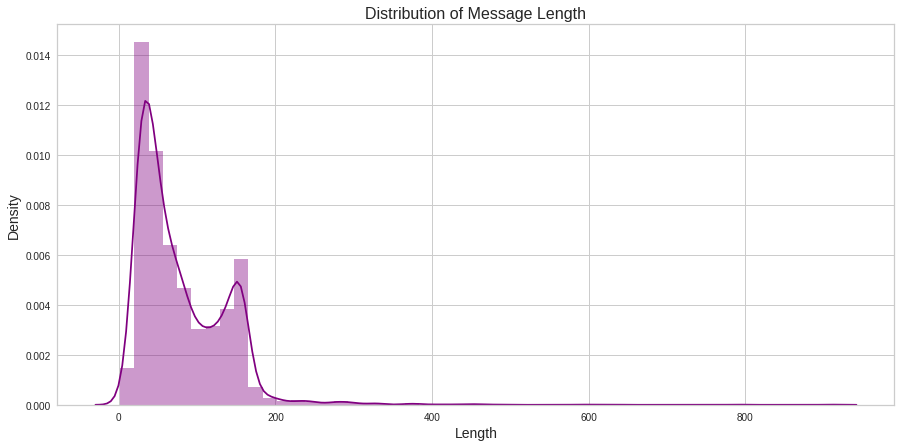

In [ ]:
plotLenght()

**Observation:**

- We can observer some positive skewness.

- There are very **few messages** who lenght in words is **greater** than **200**.

<a name = Section7></a>

---
# **7. Post Data Processing**
---

- Now we will **transform** our **data** into **compatible format** so that machine can understand.

- Our **data** set contains **5572** number of **rows** and these will be converted into **bag of words**.

- But before that we need to **clean** the **text message** by 
  
  - Removing stopwords, punctuations, delimeters, alphanumerics,
  - Converting all the words in lowercase.

- We will then create a **vector space** of words as features and their row cells will contains the respective value (1 or 0).

- We then use the **tokenized words** for each observation and find out the **frequency** of **each token**.

- Example: Lets say we have 4 documents as follows:

  ```
  Hello, how are you!
  ```
  ```
  Win money, win from home
  ```
  ```
  Call me now
  ```
  ```
  Hello, Call you tomorrow?
  ```

- Our objective here is to convert this set of text to a frequency distribution matrix, as follows:

<center><img src="https://image.ibb.co/casG7U/countvectorizer.png" width=70%, height=70%></center>

<a name = Section71></a>
## **7.1 Bag of Words**

<a name = Section711></a>
### **7.1.1 Lowecase Transformation**

---
**<h4>Question 2:** Convert all the words in lower case for the give document.</h4>

---

In [ ]:
documents = ['Hello, how are you!', 
             'Win money, win from home.', 
             'Call me now.', 
             'Hello, Call hello you tomorrow?']

- Create a function that return all the words in lower case.

In [ ]:
def lowercase(doc):
  return [d.lower() for d in documents]

- Call the function by passing the give document and print it's result.

In [ ]:
lowerCaseDoc = lowercase(doc=documents)
print(lowerCaseDoc)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


<a name = Section712></a>
### **7.1.2 Removing All Punctuations**


---
**<h4>Question 3:** Remove all the punctuations in the lowercase transformed document.</h4>

---

- Create a function that returns the documents contents without punctuations.

In [ ]:
def removePunctuation(doc):

  nonPunch = []
  
  for i in doc:
    nonPunch.append(i.translate(str.maketrans("", "", string.punctuation)))

  return nonPunch

- Call the function by passing the lowercase transformed document and print it's result.

In [ ]:
removePunch = removePunctuation(doc=lowerCaseDoc)
print(removePunch)

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


<a name = Section713></a>
### **7.1.3 Tokenization**


---
**<h4>Question 4:** Perform tokenization over the document on which you just removed all the punctuations.</h4>

---

- Create a function that returns the contents of documents as tokens.

In [ ]:
def tokenize(doc):
  return [[w for w in d.split()] for d in doc]

- Call the function by passing the punctuation removed document and print it's result.

In [ ]:
tokenDoc = tokenize(doc=removePunch)
print(tokenDoc)

[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


<a name = Section714></a>
### **7.1.4 Count Frequencies**



---
**<h4>Question 5:** Estimate the frequencies of each token with the help of Counter method defined in Collections library.</h4>

---

- Create a function that returns the count frequency of documents.

In [ ]:
def CountFreq(doc):
  return [Counter(d) for d in doc]

- Call the function by passing the tokenized document and print it's result.

In [ ]:
freqDoc = CountFreq(doc=tokenDoc)
pprint.pprint(freqDoc)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


<a name = Section72></a>
## **7.2 Count Vectorizer**

- In the above section you **saw** a version of the **CountVectorizer(**) method **from** the **scratch**.

- But we can do **similar steps** with the help of CountVectorizer() with **one line** of **code**.

- CountVectorizer() has certain parameters which take care of these steps for us which are as follows:

  ```
  lowercase: The lowercase parameter has a default value of True which converts all of our text to its lower case form.
  ```
  ```
  token_pattern: The token_pattern parameter has a default regular expression value of - (?u)\\b\\w\\w+\\b which ignores 
                 all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length 
                 greater than or equal to 2, as individual tokens or words.
  ```
  ```
  stop_words: The stop_words parameter, if set to english will remove all words from our document set that match a list of 
              English stop words which is defined in scikit-learn. 
  ```


---
**<h4>Question 6:** Perform the count vectorization over the documents feature created earlier.</h4>

---

- Create a feature as an object for CountVectorizer() and pass the respective parameters.

- **Fit** and **transform** the **data** to an array and finally **create a dataframe** that show the **frequency matrix**.

- Make sure that the **frequency matrix** **show** the **labels** of the messsages as features.

In [ ]:
def countVectorTransform(data, stopwords=None):

  countVector = CountVectorizer(lowercase=True, token_pattern='(?u)\\b\\w\\w+\\b', stop_words='english')

  docArray = countVector.fit_transform(data).toarray()

  frequency_matrix = pd.DataFrame(data=docArray, columns=countVector.get_feature_names())

  return frequency_matrix

- Call the function by passing the original document variable that was created earlier and print it's result.

In [ ]:
frequency_matrix = countVectorTransform(data = documents)
frequency_matrix

,hello,home,money,tomorrow,win
0,1,0,0,0,0
1,0,1,1,0,2
2,0,0,0,0,0
3,2,0,0,1,0


<a name = Section73></a>
## **7.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

- Before that you need to **convert** the **class labels** of Label features into **numeric**.

---
**<h4>Question 7:** Perform the count vectorization over the message feature.</h4>

---

- **Perform label encoding** over Label feature present in data.

- Take **count vectorizer transformation** over the message feature as input and Label feature as output.

- **Split** the data into **80:20** along with the **stratify** parameter inside train_test_split.

- Make sure to set the **random_state = 42**.

In [ ]:
def dataPrep():
  data.loc[:,'Label'] = data['Label'].map({'ham': 0, 'spam': 1})

  X = countVectorTransform(data= ata['Message'], stopwords='english')
  y = data['Label']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  print('Training Data Shape:', X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)

In [ ]:
dataPrep()

Training Data Shape: (4135, 8404) (4135,)
Testing Data Shape: (1034, 8404) (1034,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Multinomial Naive Bayes** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **precision and recall value** for **positive class** i.e. spam class.

- **Remember** that **we want generalize results** i.e. same results or error on testing data as that of training data.

In [ ]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

---
**<h4>Question 8:** Perform model building using Multinomial Naive Bayes over training data using default setting.</h4>

---

In [ ]:
def modelFit():
  
  naive = MultinomialNB()
  naive.fit(X_train, y_train)

  return naive

In [ ]:
model = modelFit()

---
**<h4>Question 9:** Generate a confusion matrix over the training data as well as on testing data.</h4>

---

In [ ]:
def plotConf():

  y_train_pred_count = naive.predict(X_train)
  y_test_pred_count = naive.predict(X_test)

  y_train_pred_proba = naive.predict_proba(X_train)
  y_test_pred_proba = naive.predict_proba(X_test)

  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
  plot_confusion_matrix(estimator = naive, X = X_train, y_true = y_train, cmap = 'YlGnBu', ax = ax1)
  plot_confusion_matrix(estimator = naive, X = X_test, y_true = y_test, cmap = 'YlGnBu', ax = ax2)
  ax1.set_title(label = 'Train Data', size = 14)
  ax2.set_title(label = 'Test Data', size = 14)
  ax1.grid(b = False)
  ax2.grid(b = False)
  plt.suptitle(t = 'Confusion Matrix', size = 16)
  plt.show()

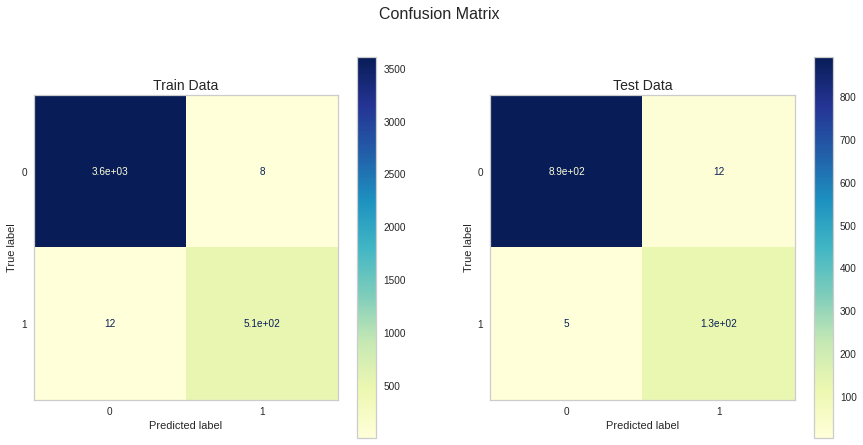

In [ ]:
plotConf()

In [ ]:
def plotReport():
  logistic_report_train = classification_report(y_train, y_train_pred_count)
  logistic_report_test = classification_report(y_test, y_test_pred_count)
  print('                    Training Report          ')
  print(logistic_report_train)
  print('                    Testing Report           ')
  print(logistic_report_test)

---
**<h4>Question 10:** Generate a classification report for training data as well as on testing data.</h4>

---

In [ ]:
plotReport()

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3613
           1       0.98      0.98      0.98       522

    accuracy                           1.00      4135
   macro avg       0.99      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135

                    Testing Report           
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.91      0.96      0.94       131

    accuracy                           0.98      1034
   macro avg       0.95      0.97      0.96      1034
weighted avg       0.98      0.98      0.98      1034



---
**<h4>Question 11:** Generate a precision and recall curve for training data as well as on testing data.</h4>

---

In [ ]:
def plotPRCurve():
  figure = plt.figure(figsize = [15, 7])
  plt.subplot(1, 2, 1)
  plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

  plt.subplot(1, 2, 2)
  plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

  plt.suptitle('Precision & Recall Curve', size = 16)
  plt.show()

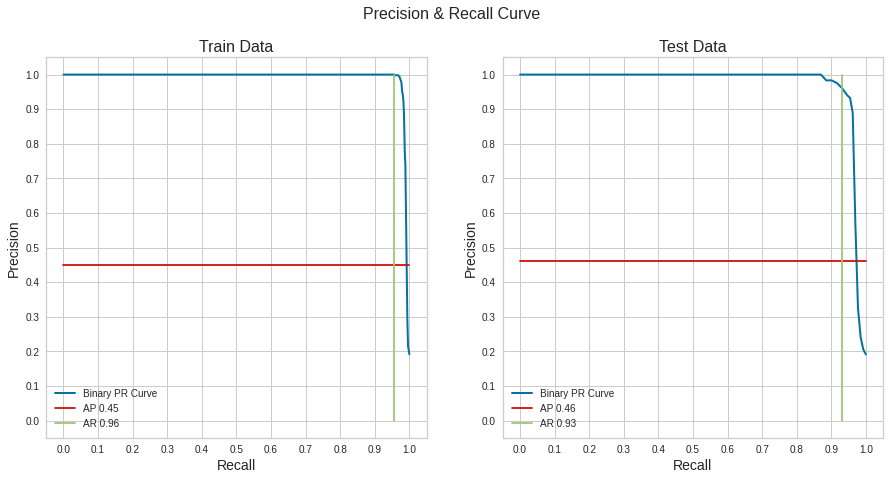

In [ ]:
plotPRCurve()

<a name = Section9></a>

---
# **9. Conclusion**
---

- We can see that **model** is **working pretty well** in **identifying** **spam** messages.

- This **model** now can **help us** in **identifying** which **message** is **spam** and which one is not.